# 3. Data Analysis, Metrics & Recommendations

## Product Sales Strategy Analysis

This notebook evaluates the performance of different sales strategies
used to promote the new office stationery product line.

It defines business metrics, quantifies strategy performance, and
translates analytical findings into actionable recommendations for
decision-makers.

In [2]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
plt.style.use("default")

In [4]:
# Ingest Raw data:

p_sales = pd.read_csv("../data/processed/p_sales_cleaned.csv")

## Data Source & Scope:

This analysis uses a processed dataset generated from the exploratory
data analysis (EDA) phase.

All data cleaning, missing value handling, outlier treatment, feature
engineering, and category standardization were completed prior to this
notebook to ensure consistency and reproducibility.

The dataset includes:
- Customer-level sales interactions
- Sales method used (Email, Call, Email + Call)
- Number of units sold
- Revenue per customer (with imputed values where applicable)
- Customer tenure (years as customer)
- Derived revenue categories (Low, Medium, High)

This notebook focuses exclusively on business analysis and decision support, rather than data preparation or exploratory validation.

### Key Business Metrics & Definitions

To evaluate the effectiveness of each sales strategy, the following key
business metrics were defined and analyzed:

#### 1. Revenue per Customer
Revenue per customer represents the monetary value generated from an
individual customer interaction.  
This metric is used to compare the overall revenue performance of each
sales method and to identify which strategies generate higher-value
customers.

#### 2. Conversion Proxy (Revenue Category)
Because direct conversion outcomes are not explicitly available, revenue
category is used as a proxy for customer value and conversion quality.
Customers are categorized into Low, Medium, or High revenue segments
based on quantiles of the revenue distribution.

This proxy enables categorical comparisons across sales methods and
supports statistical testing of performance differences.

#### 3. Sales Method Effectiveness
Sales method effectiveness is assessed by examining:
- Average and median revenue per customer
- Distribution of revenue categories by sales method
- The proportion of high-revenue customers generated by each strategy

Together, these metrics provide a comprehensive view of how each sales
approach contributes to revenue generation and customer value.


## Comparative Performance Analysis by Sales Method:

we compares the performance of each sales method using revenue
per customer and revenue category distribution to assess overall
effectiveness.

### Revenue per Customer by Sales Method

Revenue per customer was analyzed across sales methods to understand
differences in value generation.

#### Box Plot:

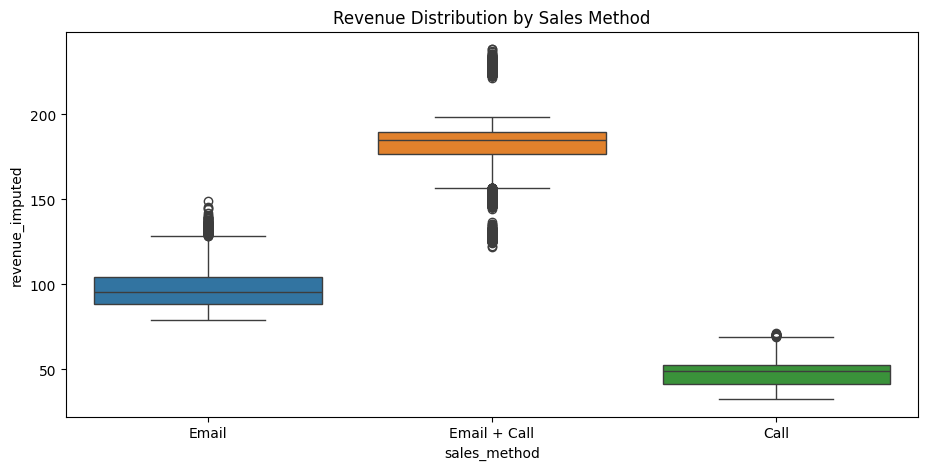

In [6]:
# Revenue x SAles method:

plt.figure(figsize=(11, 5))
sns.boxplot(data=p_sales, 
            x='sales_method', 
            y='revenue_imputed',
            hue='sales_method'
)
plt.title('Revenue Distribution by Sales Method')
plt.show()

#### Summary Statiustics:

In [7]:
p_sales.groupby('sales_method')['revenue_imputed'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4961.0,47.650613,8.456641,32.54,41.6300,49.07,52.590,71.36
Email,7465.0,97.014887,10.802488,78.83,88.3900,95.58,104.460,148.97
Email + Call,2572.0,183.798970,27.040536,122.11,176.4375,184.74,189.535,238.32


- **Call** generates the lowest revenue per customer, with values tightly
  clustered at the lower end of the revenue range.
- **Email** produces moderate revenue outcomes, with customers primarily
  concentrated in the medium-to-high revenue range.
- **Email + Call** consistently generates the highest revenue per customer,
  with a significantly higher median and upper quartile than other methods.


### Revenue Category Distribution by Sales Method

To evaluate how sales methods influence customer value, revenue category
distributions were compared across strategies.

#### Proportion bar:

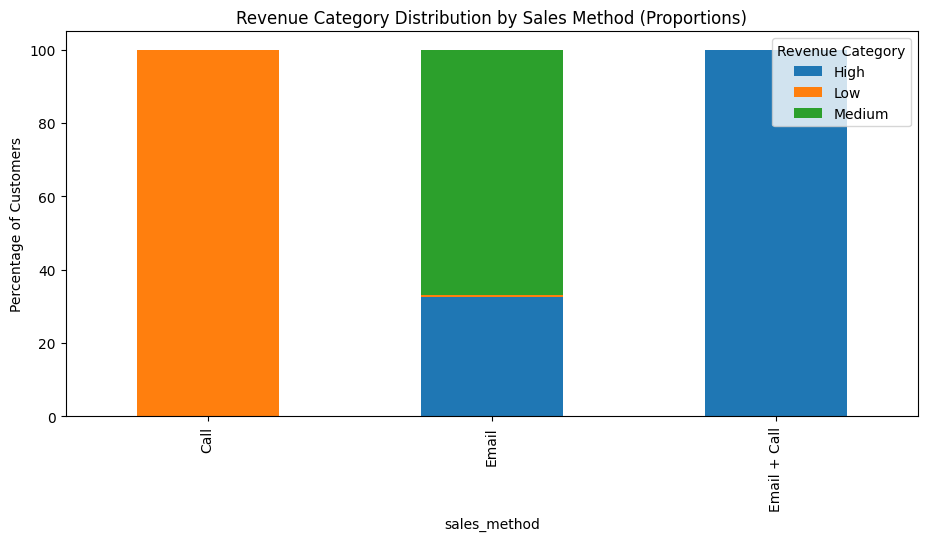

In [9]:
# Proportion table:

prop_table = pd.crosstab(
    p_sales['sales_method'],
    p_sales['revenue_category'],
    normalize='index'
) * 100

# Plot stacked bar chart
prop_table.plot(kind='bar', stacked=True, figsize=(11,5))
plt.ylabel('Percentage of Customers')
plt.title('Revenue Category Distribution by Sales Method (Proportions)')
plt.legend(title='Revenue Category')
plt.show()

#### Statistical Validation:
A chi-square test of independence (conducted during the analysis phase)
confirmed a statistically significant association between sales method
and revenue category (p < 0.05), validating the observed distributional
differences.

- **Call** predominantly results in low-revenue customers.
- **Email** generates a mix of medium- and high-revenue customers.
- **Email + Call** is exclusively associated with high-revenue customers.

These results reinforce the superior effectiveness of the combined
Email + Call strategy in generating high-value customers.


## Data Analysis Summary & Insights

The comparative analysis of sales methods reveals clear differences in revenue performance and customer value:
- Sales method significantly impacts revenue outcomes. Both visual analysis and chi-square testing confirm revenue varies substantially by sales strategy.
- Call-only strategies underperform. Customers contacted via calls are mostly low-revenue.
- Email campaigns generate medium to high revenue. Email is effective and scalable.
- Email + Call consistently produces high-value customers. All customers in this group fall into the high-revenue category, showing strong synergy.

This notebook focuses on understanding the structure, quality, and behavior of the dataset through exploratory analysis.

Key activities included data validation, distribution analysis, missing value assessment, and exploratory visualizations to identify patterns, anomalies, and relationships.

The insights generated here informed feature engineering decisions and guided the focused analyses presented in the subsequent Data Analysis notebook.

While some visuals appear in both notebooks, their purpose differs: EDA supports exploration, while this analysis notebook presents refined, decision-focused insights.

### Definition of Business Metrics

1. Primary Metric: Revenue per Customer
    - Answers: How much revenue does each customer generate per sales method?
    - Current estimates:
| Sales Method | Low (%) | Medium (%) | High (%) |
| ------------ | ------- | ---------- | -------- |
| Call         | 100     | 0          | 0        |
| Email        | 0.51    | 66.96      | 32.53    |
| Email + Call | 0       | 0          | 100      |


    - Tracking: Monitor weekly in a dashboard; use boxplots and averages to identify trends.

---

2. Supporting Metric: Revenue Category (Low / Medium / High)
    - Answers: Which customers are high-value?
    - Current estimates (proportion of customers per sales method):
| Sales Method | Low (%) | Medium (%) | High (%) |
| ------------ | ------- | ---------- | -------- |
| Call         | 100     | 0          | 0        |
| Email        | 0.51    | 66.96      | 32.53    |
| Email + Call | 0       | 0          | 100      |


    - Tracking: Stacked proportion bar charts per sales method; monitor proportion changes over time. Alert if High-value proportion drops for Email + Call or Email.

### Business Recommendations:

Key Findings
- Sales method significantly impacts customer revenue.
- Call-only = mostly low-revenue customers.
- Email = mix of medium- and high-revenue customers.
- Email + Call = consistently high-revenue customers.

Recommendations:
1. Prioritize Email + Call for high-value acquisition.
2. Use Email as baseline for scalable campaigns.
3. Reposition Call-only strategies as support/follow-up, not primary.
4. Continuously monitor revenue per customer and high-value proportion by method

Monitoring Plan:
1. Use stacked proportion bar charts per sales method.
2. Track proportion changes over time.
3. Alert if High-value proportion drops for Email + Call or Email.
